To install pylazybam we are going to use system calls to create a virtual environment and then install pylazybam into this environment.
Once pylazybam is in PyPI it will be possible to create the venv then install within reticulate

In [1]:
system("python3 -m venv ./reticulate")

In [2]:
system("./reticulate/bin/pip3 install git+git://github.com/genomematt/pylazybam.git")

In [3]:
library(reticulate)
use_virtualenv("./reticulate")

In [4]:
bam <- import("pylazybam.bam")

In [5]:
gzip <- import("gzip")

In [6]:
infile <- gzip$open("pylazybam/tests/data/paired_end_testdata_human.bam")

In [7]:
my_bam = bam$FileReader(infile)

In [8]:
cat(my_bam$header)

@HD	VN:1.0	SO:unsorted
@SQ	SN:MT	LN:16569
@SQ	SN:1	LN:249250621
@SQ	SN:2	LN:243199373
@SQ	SN:3	LN:198022430
@SQ	SN:4	LN:191154276
@SQ	SN:5	LN:180915260
@SQ	SN:6	LN:171115067
@SQ	SN:7	LN:159138663
@SQ	SN:8	LN:146364022
@SQ	SN:9	LN:141213431
@SQ	SN:10	LN:135534747
@SQ	SN:11	LN:135006516
@SQ	SN:12	LN:133851895
@SQ	SN:13	LN:115169878
@SQ	SN:14	LN:107349540
@SQ	SN:15	LN:102531392
@SQ	SN:16	LN:90354753
@SQ	SN:17	LN:81195210
@SQ	SN:18	LN:78077248
@SQ	SN:19	LN:59128983
@SQ	SN:20	LN:63025520
@SQ	SN:21	LN:48129895
@SQ	SN:22	LN:51304566
@SQ	SN:X	LN:155270560
@SQ	SN:Y	LN:59373566
@PG	ID:bowtie2	PN:bowtie2	VN:2.0.0-beta6


In [9]:
as <- list()
xs <- list()

count = 0
for (align in iterate(my_bam)){
  count = count + 1
  as[[count]] <- bam$get_AS(align)
  xs[[count]] <- bam$get_XS(align)
}


In [10]:
df <- data.frame(cbind(as,xs))

In [11]:
df[1:6,]

,as,xs
,<list>,<list>
1,198,126
2,189,50
3,NA,NA
4,NA,NA
5,198,72
6,194,NA


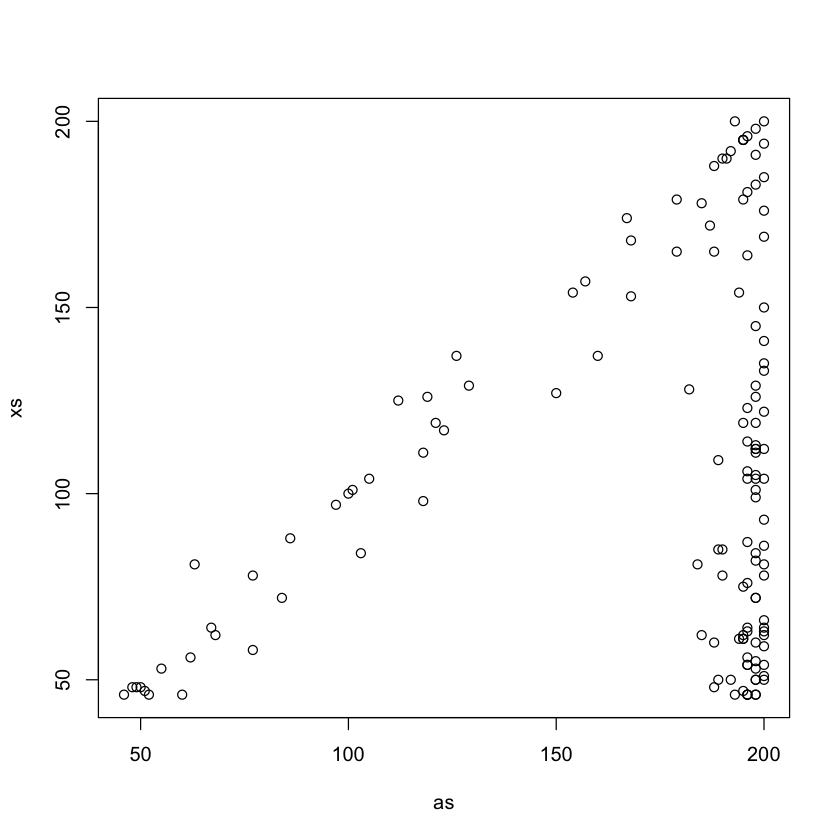

In [12]:
plot(df)

In [13]:
sessionInfo()

R version 3.6.2 (2019-12-12)
Platform: x86_64-apple-darwin18.7.0 (64-bit)
Running under: macOS Mojave 10.14.6

Matrix products: default
BLAS/LAPACK: /usr/local/Cellar/openblas/0.3.7/lib/libopenblasp-r0.3.7.dylib

locale:
[1] en_AU.UTF-8/en_AU.UTF-8/en_AU.UTF-8/C/en_AU.UTF-8/en_AU.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] reticulate_1.14

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.3      digest_0.6.23   crayon_1.3.4    IRdisplay_0.7.0
 [5] repr_1.1.0      jsonlite_1.6.1  evaluate_0.14   pillar_1.4.3   
 [9] rlang_0.4.4     uuid_0.1-2      vctrs_0.2.2     IRkernel_1.1   
[13] tools_3.6.2     compiler_3.6.2  base64enc_0.1-3 htmltools_0.4.0
[17] pbdZMQ_0.3-3   

In [14]:
print(bam)

Module(pylazybam.bam)
